In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
%matplotlib inline

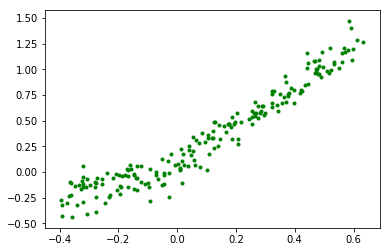

In [45]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)
# y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
y = tnn.LeakyRelu(alpha=0.3).forward(x*2-0.75)
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

## Using Relu to analyse gradients

In [46]:
layer1 = tnn.NonLinearLayer(1, 1, activation=tnn.Relu(), optimizer=tnn.Adam())

y_out = layer1.forward(xx)
dy = y_out - yy
dx = layer1.backward(dy)

#### Analyse the gradients before and after optimizing the parameters

_______________________
epoch 0
Loss 0.008324825163039808
_______________________
epoch 100
Loss 0.008324825163039808
_______________________
epoch 200
Loss 0.008324825163039807
_______________________
epoch 300
Loss 0.008324825163039807
_______________________
epoch 400
Loss 0.008324825163039807
_______________________
epoch 500
Loss 0.008324825163039808
_______________________
epoch 600
Loss 0.008324825163039808
_______________________
epoch 700
Loss 0.008324825163039808
_______________________
epoch 800
Loss 0.008324825163039808
_______________________
epoch 900
Loss 0.008324825163039808
_______________________
epoch 1000
Loss 0.008324825163039808
_______________________
epoch 1100
Loss 0.008324825163039808
_______________________
epoch 1200
Loss 0.008324825163039808
_______________________
epoch 1300
Loss 0.008324825163039808


TclError: invalid command name "pyimage176"

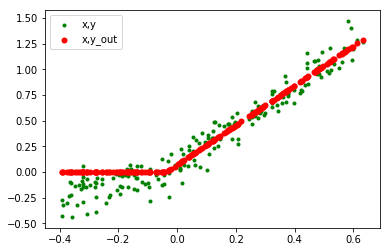

In [61]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    y_out = layer1.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    dy = tnn.MseLoss.del_loss(y_out, yy)
    
    dx = layer1.backward(dy)
    
    layer1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,y_out')
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(5)
            break

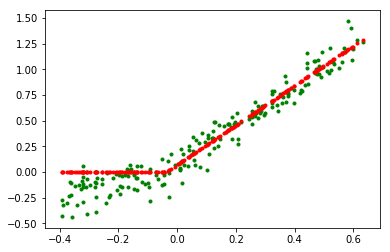

In [62]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, y_out.reshape(-1), marker='.', color='r')

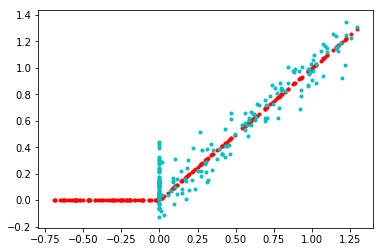

In [63]:
plt.scatter(layer1.zee, layer1.output, marker='.', c='r')
plt.scatter(layer1.output, layer1.output+layer1.del_output, marker='.', c='c')

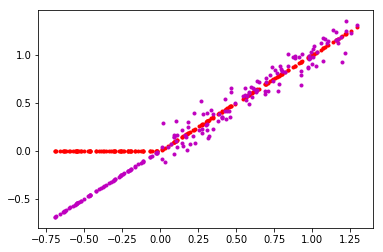

In [64]:
plt.scatter(layer1.zee, layer1.output, marker='.', c='r')
plt.scatter(layer1.zee, layer1.zee+layer1.del_zee, marker='.', c='m')

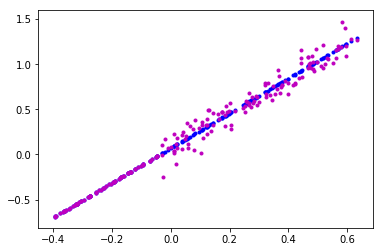

In [65]:
plt.scatter(layer1.input, layer1.zee, marker='.', c='b')
plt.scatter(layer1.input, layer1.zee-layer1.del_zee, marker='.', c='m')

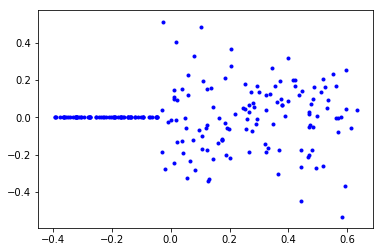

In [66]:
plt.scatter(layer1.input, dx, marker='.', c='b')

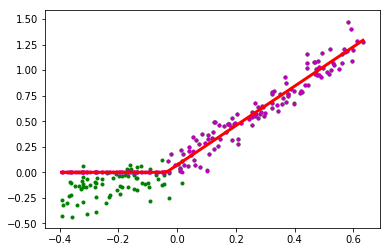

In [67]:
y_out_ = layer1.forward(xx-0.27*dx)
dy_ = y_out_ - yy
dx_ = layer1.backward(dy_)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y_out.reshape(-1), color='r', lw=3)
plt.scatter(x, y_out_.reshape(-1), marker='.', color='m')

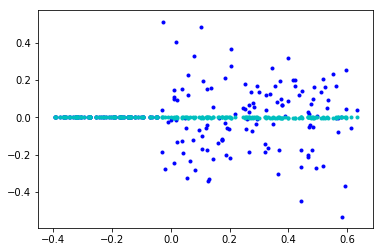

In [68]:
plt.scatter(x, dx, marker='.', c='b')
plt.scatter(x, dx_, marker='.', c='c')

## Relu Network

In [14]:
net = tnn.AutoForm(new_layers=True)
l1 = tnn.NonLinearLayer(1, 1, activation=tnn.Relu(), optimizer=tnn.Adam())
l2 = tnn.LinearLayer(1,1,optimizer=tnn.Adam())

y_out = net.forward(xx)
dy = y_out - yy
dx = net.backward(dy)

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plt.ion()
# fig.show()
# fig.canvas.draw()

for step in range(100000):
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    dy = tnn.MseLoss.del_loss(y_out, yy)
    
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, y_out.reshape(-1), marker='.', c='r', lw=3, label='x,y_out')
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(5)
            break

_______________________
epoch 0
Loss 0.24100628987226813
_______________________
epoch 100
Loss 0.037921536131502405
_______________________
epoch 200
Loss 0.006745202297635308
_______________________
epoch 300
Loss 0.00670206523305199
_______________________
epoch 400
Loss 0.006701847506504082
_______________________
epoch 500
Loss 0.0067018468139949
_______________________
epoch 600
Loss 0.006701846813653727
_______________________
epoch 700
Loss 0.0067018468136537225
_______________________
epoch 800
Loss 0.0067018468136537225
_______________________
epoch 900
Loss 0.0067018468136537225
_______________________
epoch 1000
Loss 0.0067018468136537225
_______________________
epoch 1100
Loss 0.0067018468136537225
_______________________
epoch 1200
Loss 0.0067018468136537225
_______________________
epoch 1300
Loss 0.0067018468136537225
_______________________
epoch 1400
Loss 0.0067018468136537225
_______________________
epoch 1500
Loss 0.0067018468136537225
_______________________
epoch 1

TclError: invalid command name "pyimage72"

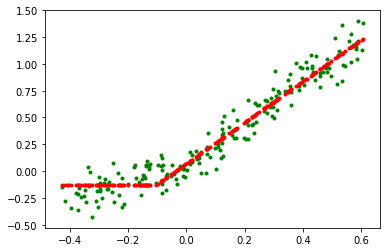

In [16]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, y_out.reshape(-1), marker='.', color='r')

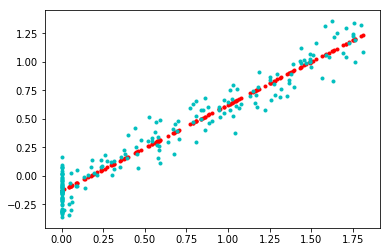

In [17]:
plt.scatter(l2.input, l2.output, marker='.', c='r')
plt.scatter(l2.input, l2.output+l2.del_zee, marker='.', c='c')

In [8]:
class Relu_linear_backprop(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
        return output_delta
#         return ((self.x >= 0).astype(float)) * output_delta

In [9]:
# Relu with different gradient for zero region

In [10]:
class Relu_clipped_backprop(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
#         return output_delta
        return np.where(self.x >= 0, output_delta, self.x)
#         return ((self.x >= 0).astype(float)) * output_delta